Import the NumPy and Matplotlib modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Exercise 08.1 (function plotting)

Consider the function 
$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$
from $x = -4\pi$ to $x = 4\pi$.

(1) Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.

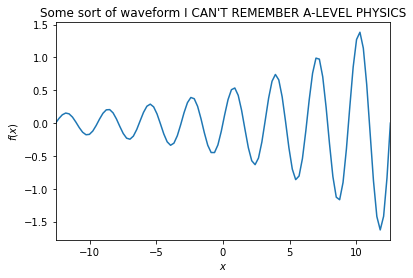

In [14]:
num_points = 100
x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)

f = np.exp(x/10)*np.sin(x)*np.cos(x) #𝜔 0 = 𝜔 1 =1

plt.plot(x,f)
plt.xlim(x[0], x[-1])
plt.xlabel('$x$')
plt.ylabel('$f(x)$') #dollar signs for LaTex
plt.title("Some sort of waveform I CAN'T REMEMBER A-LEVEL PHYSICS")
plt.show()


(2) Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

In [3]:
from ipywidgets import * #asterisk imports everything from that module into the current module namespace.
#"This allows using the various objects (variables, classes, methods...) from the imported module without prefixing them with the module's name."

def plot(ω0=1,ω1 =1): #does not have to be called plot; default values are 1
    num_points = 100
    x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)

    f = np.exp(x/10)*np.sin(ω0*x)*np.cos(ω1*x) #𝜔 0 = 𝜔 1 =1

    plt.plot(x,f)
    plt.xlim(x[0], x[-1])
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()
interact(plot,ω0=(0,2,0.1),ω1=(0,2,0.1))

interactive(children=(FloatSlider(value=1.0, description='ω0', max=2.0), FloatSlider(value=1.0, description='ω…

<function __main__.plot(ω0=1, ω1=1)>

## Exercise 08.2 (multiple function plotting)

Plot the function 

$$
f(x)  = \frac{\sin(x)}{x}
$$

from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when 
$x$ is close to zero.
  
Add to the above plot the graph of $1/ \left| x \right|$, and limit the range of the $y$ axis to 1 using
`plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each 
component of a NumPy array `x`.)

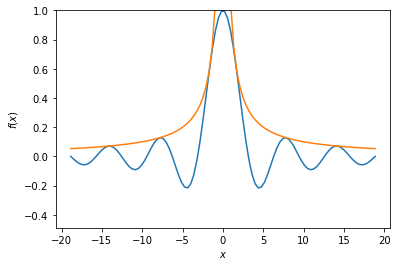

In [28]:
x = np.linspace(-6*np.pi,6*np.pi,num=100) #Think carefully about which  𝑥  values you use when  𝑥  is close to zero.
#Don't plot an odd number of points (num), otherwise the function will take 0 as an input which it can't evaluate!
f2 = np.sin(x)/x
plt.plot(x,f2)
plt.plot(x,1/np.abs(x)) #need np.abs to apply to whole array x
plt.ylim(top=1) #first parameter of ylim is the bottom value so we must specify top
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

## Exercise 08.3 (demographics and interactive plotting)

A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:

- the growth rates are constant in each district;
- the growth rate will not be negative in any district; and 
- the annual growth rate in any one district will not exceed 10%.

Building on the pie chart example with population data in the Activity notebook, create an interactive plot with:

1. A slider for the year (from 2011 to 2021); and
2. Sliders for the annual population growth for each district (in percentage), with an 
   initial value of zero for each district.

### Solution

There are a number of ways in which this exercise could be done, from very simple but not very robust with respect to changes in the order of the input data, to quite techical but robust with respect to the order in which data is entered.

In [4]:
# List of (district, population) data (in 2011)
population_data = (('Cambridge City', 123900), 
                   ('East Cambridgeshire', 83800), 
                   ('Fenland', 95300), 
                   ('Huntingdonshire', 169500), 
                   ('South Cambridgeshire', 148800))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red'] #can't modify global variables within the function

def pieplot(Year = 2011, CamCityGrowthRate = 0, EastCamShireGrowthRate=0, FenlandGrowthRate=0, HuntShireGrowthRate=0, SouthCamShireGrowthRate=0): 
#the growth rates for each region in percentage terms
#unless you manually configure the widgets, the slider labels are the same as the parameter names.
    
    growth = [CamCityGrowthRate, EastCamShireGrowthRate, FenlandGrowthRate, HuntShireGrowthRate, SouthCamShireGrowthRate]
    
    growth = [(1+i/100)**(Year - 2011) for i in growth]
    
    population = [g*p for g,p in zip(growth, [j[1] for j in population_data])]

    # Produce pie chart. The slices will be ordered and plotted counter-clockwise.
    plt.pie(population, labels=[i[0] for i in population_data], colors=colors,
            autopct= lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(population)/100), shadow=True, startangle=90)   
    #p represents the elements i.e. percentages of the pie chart.
    #originally autopct='%1.1f%%'
    #.2f is a conversion specifier for float with 2 decimal places of precision
    
    #: marks the beginning of the format
    #:, uses comma as thousand separator
    
    #The {:06.2f} placeholder means, "Reserve at least 6 characters for the value,
    #two of which will appear after the decimal point. Fill any empty spaces with zeroes." 
    #The decimal point (.) also counts as one character.
    
    #lambda function allows us to show the actual population figures too
 
    #list comprehensions to extract the data from the tuple of tuples WOOHOO!

    plt.title("Visualisation for 2011-2021 population distribution in Cambridgeshire")
    plt.show()

interact(pieplot,Year = (2011,2021,1),CamCityGrowthRate =(0,10,1),EastCamShireGrowthRate =(0,10,1),FenlandGrowthRate =(0,10,1),HuntShireGrowthRate =(0,10,1),SouthCamShireGrowthRate =(0,10,1))

interactive(children=(IntSlider(value=2011, description='Year', max=2021, min=2011), IntSlider(value=0, descri…

<function __main__.pieplot(Year=2011, CamCityGrowthRate=0, EastCamShireGrowthRate=0, FenlandGrowthRate=0, HuntShireGrowthRate=0, SouthCamShireGrowthRate=0)>

In [63]:
print('{:1.1f}'.format(1.45)) #because 1.45 is stored as 1.49999999, not exact in Python.
print('{:6.1f}'.format(1.45)) #extra reserved character space treated as zeros

1.4
   1.4


## Exercise 08.4 (crime reports by location)

### Background

Your task is to produce a crime report data plot in the neighborhood of your college, by reported crime
category.

We can get crime data in the UK from the police data systems using what is known as a *REST API*,
and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
(an entry is a Python dictionary detailing the report).

The first step is to import the modules we will be using:

In [5]:
import json
import requests

The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is

    https://data.police.uk/api/crimes-street/all-crime?lat=52.629729&lng=-1.131592&date=2017-01
    
This return crimes reports within a mile radius of the geographic coordinate point for the month `2017-01`.          

Below we create this URL string to include a part of the Cambridge city centre. You can modify this for your own college or other areas of interest (Google Maps is a handy way to get the geographic coordinates).

In [6]:
# A point in the Cambridge city centre
long, lat = 52.205277, 0.119117

# year-month of interest
year_month = '2019-05'

# Construct request URL string
url = "https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(long, lat, year_month)

# Fetch data from https://data.police.uk
r = requests.get(url)

The following converts the fetched data into a list of dictionaries:

In [7]:
crime_data = r.json()

To get an idea of how the data is arranged, we can look at the first report in the list. To make the displayed data easier to read, we use the 'pretty print' module `pprint`.

In [67]:
import pprint
if crime_data: #if crime_data not empty i.e. false
    pprint.pprint(crime_data[0])

{'category': 'anti-social-behaviour',
 'context': '',
 'id': 74130786,
 'location': {'latitude': '52.203222',
              'longitude': '0.133315',
              'street': {'id': 560703, 'name': 'On or near Palmers Walk'}},
 'location_subtype': '',
 'location_type': 'Force',
 'month': '2019-05',
 'outcome_status': None,
 'persistent_id': ''}


Each dictionary item corresponds to a reported crime.

### Task

Produce a bar chart of the number of reports in different categories. Run your program for different parts of Cambridge, starting with the area around your college, and for different months and years.

#### Hints

Create an empty dictionary, which will eventually map the report category to the number of incidents:

In [68]:
categories_freq = {}

Iterate over all reports in the list, and extract the category string from each report. If the category string (the 'key') is already in the dictionary increment the associated counter. Otherwise add the key to the dictionary, and associate the value 1.

In [69]:
# Iterate over all reports
for report in crime_data:
    # Get category type
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        pass  # This can be removed once the 'if' block has a body
    else:
        # Add category to dictionary here
        pass  # This can be removed once the 'else' block has a body

The crime categories are the dictionary keys, which can be extracted using
```python
list(categories_freq.keys())
```

When adding the tick labels (crime categories), it may be necessary to rotate the labels, e.g.:
```python
plt.xticks(x_pos, categories, rotation='vertical')
```

### Extensions (optional)


1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.
3. Explore what other data you can retriev from https://data.police.uk/docs/.

### Solution

There are many ways this exercise could be programmed, and there is some choice in data structures.

Build (a) a list of crime categories and (b) the number of reports in each category:

In [8]:
# Empty dictionary
categories_freq = {}

long, lat = 52.2060, 0.1180 #latitude and longitude for Gonville and Caius

# year-month of interest
year_month = '2020-02'


# Construct request URL string
url = "https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(long, lat, year_month)
r = requests.get(url)
crime_data = r.json()
#converts fetched data into list of dictionaries

for report in crime_data:
    
    if report['category'] in categories_freq: #e.g. public order
        categories_freq[report['category']] +=1
    else:
        categories_freq[report['category']] =1 #create new key for the new category and set the occurrence to 1
        


Produce a bar chart:

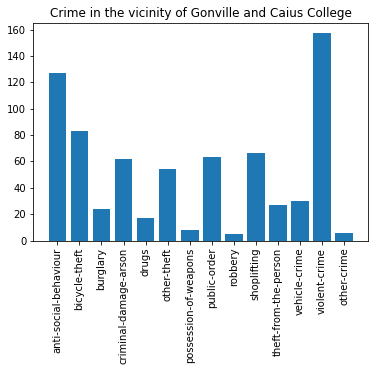

In [9]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(categories_freq))

#categories = []
#frequencies = []
#for i in categories_freq: 
    #categories.append(i)
    #frequencies.append(categories_freq[i])
    
categories = list(categories_freq.keys()) #need to convert to list otherwise it returns a 'view' object
#these are all the crime categories...right?

frequencies = list(categories_freq.values()) #or, could grab the values from dict using the keys above
    
plt.bar(x_pos, frequencies,align = 'center')
plt.xticks(x_pos, categories, rotation='vertical') #rotation = 90 also works
plt.title("Crime in the vicinity of Gonville and Caius College")
plt.show()

Here is a compact version using dictionary member functions (it will be visible when solutions are released).

In [ ]:
#??????????????


In [10]:
#interact for date


long, lat = 52.2060, 0.1180 #latitude and longitude for Gonville and Caius
@interact(year = (2015,2020,1),month=(1,12,1))
def crimebar(year,month):
    if month<10:
        month ="0"+str(month)
    url = "https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}-{}".format(long, lat, year,month)
    print(url)
    r = requests.get(url)
    crime_data = r.json()
    #converts fetched data into list of dictionaries
    categories_freq = {}
    for report in crime_data:
    
        if report['category'] in categories_freq: #e.g. public order
            categories_freq[report['category']] +=1
        else:
            categories_freq[report['category']] =1 
    
    x_pos = np.arange(len(categories_freq))


    categories = list(categories_freq.keys()) 

    frequencies = list(categories_freq.values()) 

    plt.bar(x_pos, frequencies,align = 'center')
    plt.xticks(x_pos, categories, rotation='vertical') #rotation = 90 also works
    plt.title("Crime in the vicinity of Gonville and Caius College")
    plt.show()
    
#I don't know if it's specific to the location I specified
#but there's no data before July 2017
#trying to grab data from June 2017, for instance,gives a JSONDecodeError


interactive(children=(IntSlider(value=2017, description='year', max=2020, min=2015), IntSlider(value=6, descri…